In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv("/home/leon/Desktop/market/data/vector_data_ratings.csv")

In [2]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
sum([np.isnan(x) for x in data.values.sum(axis=1)])

1

In [4]:
data = data.iloc[:-1,1:]

In [5]:
Z = linkage(data.values, 'complete', 'cityblock')

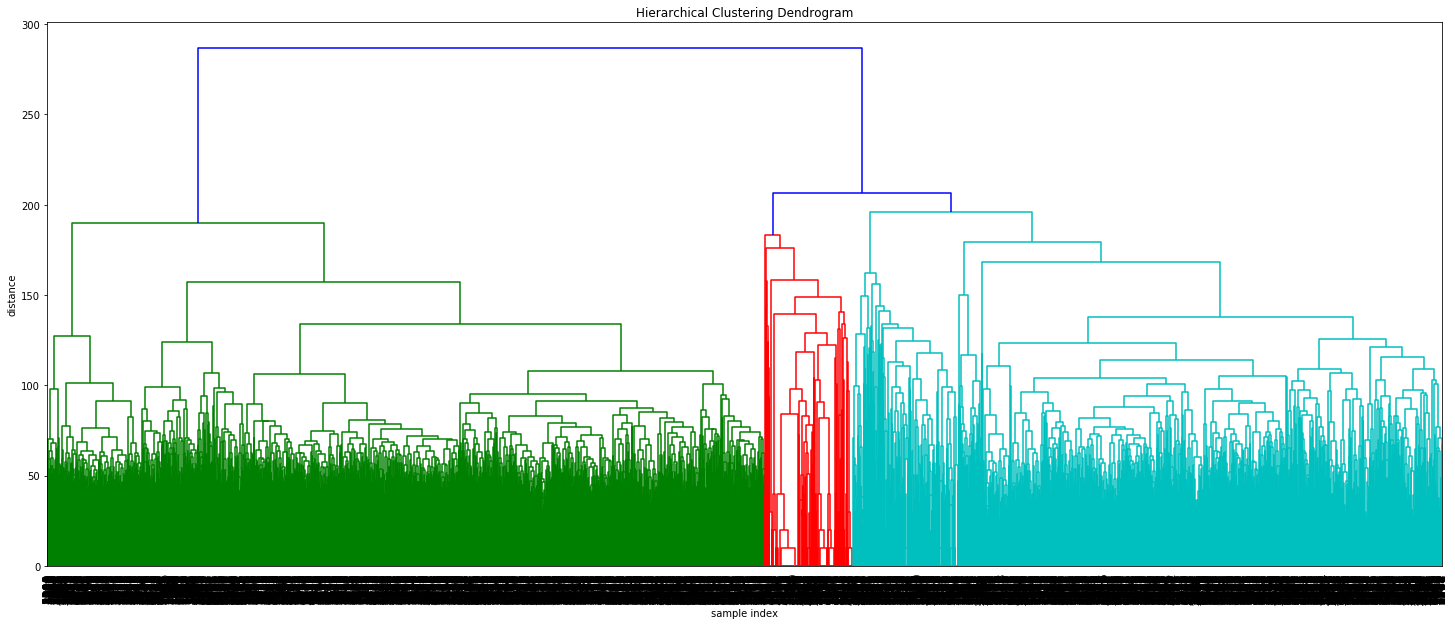

In [6]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=12.,  # font size for the x axis labels
)
plt.show()

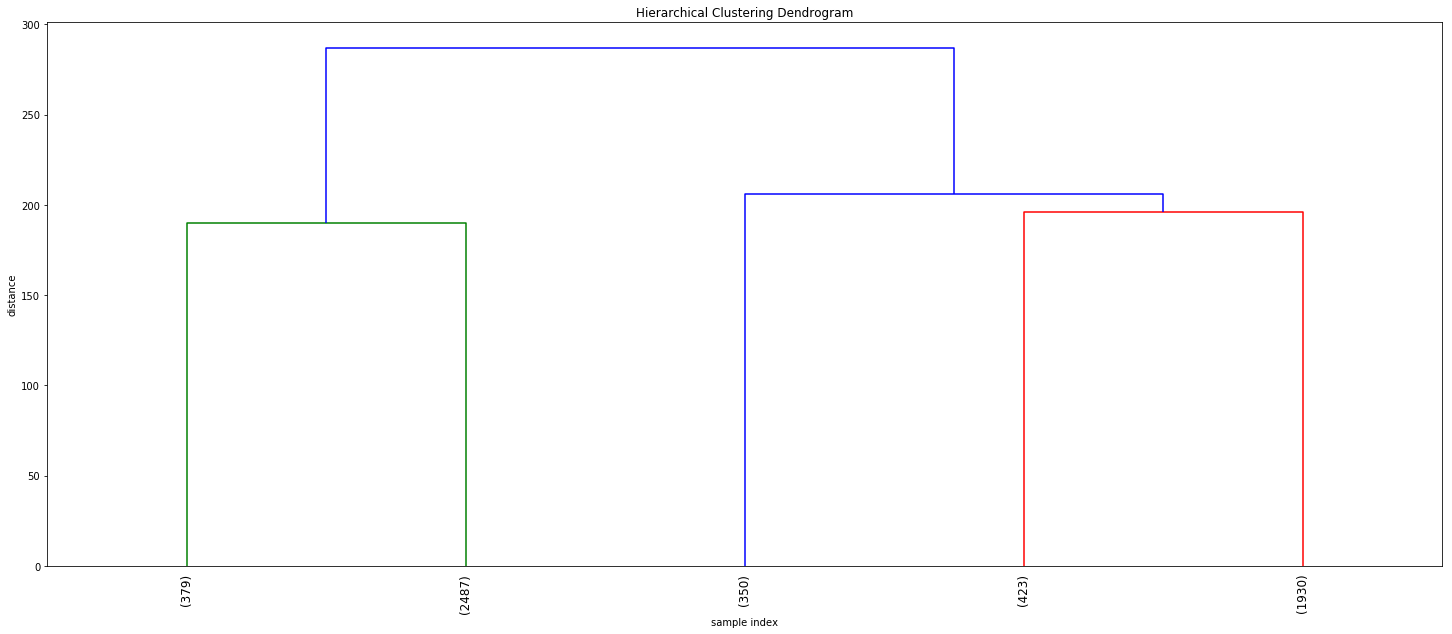

In [7]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=5,  # show only the last p merged clusters
    show_leaf_counts=True,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=12.,  # font size for the x axis labels
)
plt.show()

In [8]:
Z[-10:, 2]

array([158.0515587 , 162.0151923 , 168.49718972, 176.1490187 ,
       179.43508143, 183.1095562 , 190.09016852, 195.7492845 ,
       206.2539979 , 286.63990405])

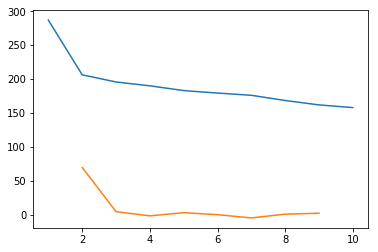

clusters:2


In [9]:

last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()

k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print("clusters:{}".format(k))

In [10]:
from scipy.cluster.hierarchy import fcluster
k = 7
cluster = fcluster(Z, k, criterion='maxclust')

In [11]:
cluster = pd.DataFrame(cluster)

data = pd.concat([data, cluster], axis=1)

In [12]:
cluster_data = []
for x in np.arange(1,k+1):
    cluster_data += [data[data.iloc[:,-1] == x]] 

In [13]:
[(np.mean(x.iloc[:,0]), x.shape[0]) for x in cluster_data]

[(0.779419525065963, 379),
 (0.8219541616405308, 2487),
 (0.6, 2),
 (0.8212643678160921, 348),
 (0.9527186761229315, 423),
 (0.26086956521739124, 92),
 (0.9250272034820458, 1838)]

In [16]:
cluster_max = [np.amax(x, axis=0) for x in cluster_data]
cluster_mean = [np.mean(x, axis=0) for x in cluster_data]

In [23]:
for x in np.arange(k):
    cluster_max[x].iloc[:50] = cluster_mean[x].iloc[:50]

In [25]:
len(cluster_max)

7

In [131]:
a = np.array([1,2,3])
b = np.array([5,2,3])
cosine_similarity(a,b)

0.7803989725717081

In [121]:
def cosine_similarity(a,b):
    return(a.dot(b.T)/(np.sqrt((a**2).sum()) * np.sqrt((b**2).sum())))

In [136]:
for x in np.arange(k):
    #cluster_data[x] = cluster_data[x].iloc[:,:-1]
    print(cluster_data[x].shape)
    sims = []
    for index, row in cluster_data[x].iterrows():
        sims.append(cosine_similarity(row.values[49:], cluster_max[x][49:]))
    
    cluster_data[x]["similarity"] = sims
        
        
        

(379, 351)
(2487, 351)
(2, 351)
(348, 351)
(423, 351)
(92, 351)
(1838, 351)


(379, 352)

In [45]:
import json
with open("/home/leon/Desktop/market/data/all_data2.json", "r") as f:
    review_list = json.load(f)

In [137]:
example_reviews = []
for x in np.arange(k):
    example_index = np.argmax(cluster_data[x]["similarity"])
    print(example_index)
    example_reviews += [review_list["reviews"][example_index]]
    

576
3010
2049
2364
1602
1056
1438


/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


In [134]:
cosine_similarity(np.array([0.779]*10 + [5]), np.array([0.2]*10 + [1]))

0.9943696963535177

In [123]:
a = np.array([0.779]*10)
b = np.array([0.2]*10)

In [132]:
np.sqrt((a**2).sum()) * np.sqrt((b**2).sum())

23.06512518934159

In [133]:
a.dot(b.T)

18

In [138]:
[(np.mean(x.iloc[:,0]), x.shape[0]) for x in cluster_data]

[(0.779419525065963, 379),
 (0.8219541616405308, 2487),
 (0.6, 2),
 (0.8212643678160921, 348),
 (0.9527186761229315, 423),
 (0.26086956521739124, 92),
 (0.9250272034820458, 1838)]

In [139]:
example_reviews

[{'review_author': '',
  'review_comment_count': '',
  'review_header': 'One Star',
  'review_posted_date': '12 Nov 2016',
  'review_rating': '1.0 ',
  'review_text': 'Instructions not in English'},
 {'review_author': '',
  'review_comment_count': '',
  'review_header': 'Feels ridiculous but somehow super amazing at the same time',
  'review_posted_date': '16 Dec 2017',
  'review_rating': '5.0 ',
  'review_text': 'I don’t have time to write reviews very often. I read them a lot, so I’m trying to be better about taking the time out for things I enjoy. This mask is a freaking delight. The bubbles tickle like hell and my skin always feel so fresh and clean afterwards. The countless five star reviews are not wrong. Totally worth the 11 bucks. I’ve done it twice in one week, if that tells you anything. It’s just so much fun and feels like it works really well! Definitely will repurchase when I run out.'},
 {'review_author': '',
  'review_comment_count': '',
  'review_header': 'Five Stars',
